<a href="https://colab.research.google.com/github/aekanun2020/2022-PEA-ML-scikitLearn-Spark/blob/main/M_B_sklearn_ClustomerBehavior_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
! wget https://storage.googleapis.com/aekanunlab/Mall_Customers.csv

--2022-12-06 07:17:39--  https://storage.googleapis.com/aekanunlab/Mall_Customers.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/csv]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2022-12-06 07:17:40 (52.6 MB/s) - ‘Mall_Customers.csv’ saved [4286/4286]



In [3]:
# ! pip install kaggle --upgrade
# ! pip install plotly --upgrade

In [4]:
import numpy as np 
import pandas as pd 
from pandas import plotting

import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')

import plotly as py
import plotly.graph_objs as go
#py.offline.init_notebook_mode(connected = True)

from sklearn.cluster import KMeans
import fastai

import warnings
import os
from pathlib import Path
warnings.filterwarnings("ignore")

# **1. Business Understanding**

1.1 Problem Statement: ธุรกิจต้องการทราบกลุ่มลูกค้าที่จะนำเสนอสินค้าหรือบริการให้เหมาะสมกับ Demographic เช่น เพศ อายุ Geographic เช่น พื้นที่ Psychographic เช่น ไลฟ์สไตล์ ฐานะทางสังคม และ Behavioral เช่น พฤติกรรมการใช้จ่าย การใช้งานสินค้าหรือบริการ เป็นต้น

1.2 Project Objective: เพิ่มยอดขาย และสร้างความพึ่งพอใจให้กับลูกค้าด้วยการนำเสนอสินค้าและบริการที่สอดคล้องกับความต้องการกับลูกค้ามากขึ้น

1.3 Requirements from Business Perspectives: -


1.4 Analytics Approaches: Unsupervised Learning with Clustering Task ซึ่ง ให้คำตอบเป็นกลุ่มข้อมูล ซึ่งมาจาก pattern ที่ซ้ำกันของข้อมูล เช่น ซ้ำในช่วงรายได้เดียวกัน ซ้ำในช่วงอายุเดียวกัน เป็นต้น กรณีสามารถใช้ k-Means algorithm ได้

k-Means เป็น algorithm ที่มีการหลักการทำงานเป็น กำหนด centroid ขึ้นมาเพื่อใช้จัดกลุ่มข้อมูล โดยมี 1 centroid ต่อ 1 กลุ่ม และมี centroid เป็นศูนย์กลางของกลุ่ม 

ในกรณีนี้เราสามารถมี centroid ได้หลายตัว (k ตัว) ด้วยการวัดความห่างระหว่างทุก data point กับ centroid  หาก data point ห่างจาก centroid ตัวใดน้อยที่สุดแล้ว data point นั้น ถูกจัดอยู่กลุ่มที่มี centroid เป็นศูนย์กลางนั่นเอง

Centroid แต่ละตัว และ data point แต่ละตัว  ประกอบด้วย feature ตั้งแต่ 1 ตัวขึ้นไป ดังนั้น การวัดความห่างคือ ผลรวมของความต่างเชิงปริมาณระหว่างคู่ feature แต่ละตัว ผลรวมความต่างฯ มีหลากหลายรูปแบบ ในรูปแบบหนึ่งคือ Sum of Square Errors ซึ่งเรียกว่า Inertia อัลกอริทึม k-Means จะหยุดทำงานเมื่อ Inertia ไม่เปลี่ยนแปลงอีกต่อไป

อย่างไรก็ตาม โดยทั่วไป อัลกอริทึมจะไม่ทราบว่า k เท่าไหร่จึงจะทำให้ Inertia ต่ำที่สุด ดังนั้น k จึงเป็น Hyperparameter 

ความจริงอันหนึ่งคือ k เพิ่มขึ้น จะส่งผลให้ Inertia ต่ำลงโดยธรรมชาติ การค้นหาว่า Inertia ต่ำที่สุดคือค่าใด และเป็น k ตัวใดนั้น เป็นการใช้วิธีที่เรียกว่า Elbow-Method

1.5 Success Criteria: ใช้การตีความผลการทดลอง โดยเลือกเฉพาะผลการทดลองที่ตอบโจทย์และเป็นประโยชน์กับธุรกิจ


# **2. Data Understanding**

In [5]:
raw_pd =  pd.read_csv('Mall_Customers.csv')
raw_pd.shape

(200, 5)

In [6]:
raw_pd.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **2.1 Univariate Analysis**

ทราบ Null profile, Dispersion profile, Outlier profileเพื่อกำหนดแนวทาง Clean/Transform ข้อมูล

In [7]:
raw_pd.describe()

### ไม่พบ Null profile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
basicUnivariate_pd = raw_pd.describe().transpose()[['mean','std']]

In [9]:
basicUnivariate_pd

,mean,std
CustomerID,100.50,57.879185
Age,38.85,13.969007
Annual Income (k$),60.56,26.264721
Spending Score (1-100),50.20,25.823522


In [10]:
basicUnivariate_pd = basicUnivariate_pd.assign(cv=lambda x: (x['std']/x['mean'])*100)

In [11]:
basicUnivariate_pd

### High Dispersion Profile: ไม่มีตัวไหนที่ Dispersion สูงเกินกว่า 100%

,mean,std,cv
CustomerID,100.50,57.879185,57.591228
Age,38.85,13.969007,35.956261
Annual Income (k$),60.56,26.264721,43.369751
Spending Score (1-100),50.20,25.823522,51.441278


In [12]:
raw_pd.dtypes

### ไม่พบ Type Mismatch profile

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
raw_pd.isnull().sum()

### Null Profile: พบว่าไม่มีค่า NULL

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

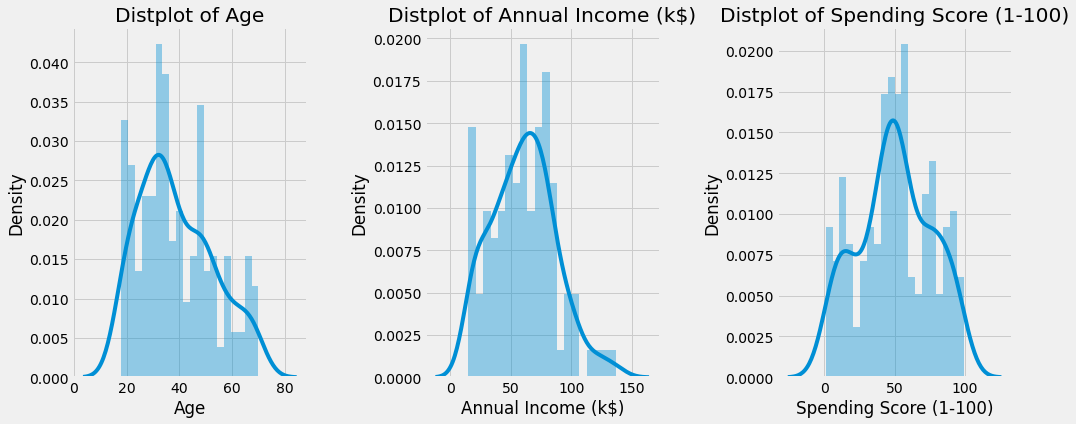

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(raw_pd[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### มี Shape ใกล้เคียง Normal Distribution ไม่ใช่ Exponential จึงน่าจะไม่มี Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c6a5c20d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c6a5c2790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c6a5b1d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c6a5c2e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c6a5cc190>],
 'means': []}

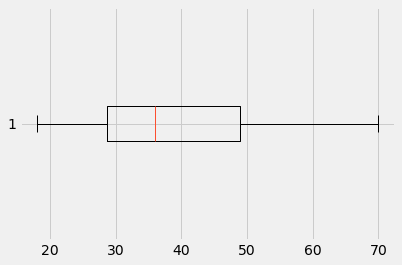

In [15]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=raw_pd['Age'], vert=False, flierprops=red_circle)

### ไม่พบ Outlier ในทางสถิติ สำหรับ Age

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c68d11be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c68d1d2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c68d11880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c68d1d9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c68d1dca0>],
 'means': []}

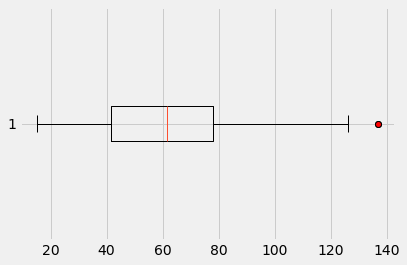

In [16]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=raw_pd['Annual Income (k$)'], vert=False, flierprops=red_circle)

### ในทางสถิติพบ Outlier น้อยมาก สำหรับ Annual Income

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8c68cedc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c68cfd370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8c68ced910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c68cfda30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c68cfdd30>],
 'means': []}

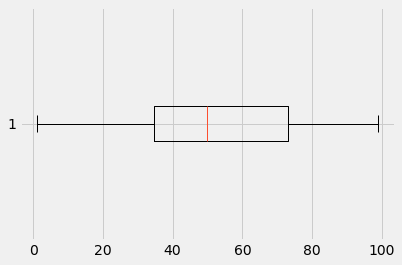

In [17]:
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=raw_pd['Spending Score (1-100)'], vert=False, flierprops=red_circle)

### ไม่พบ Outlier ในทางสถิติ สำหรับ Spending Score

In [18]:
labels = ['Female', 'Male']
size = raw_pd['Genre'].value_counts()
size

Female    112
Male       88
Name: Genre, dtype: int64

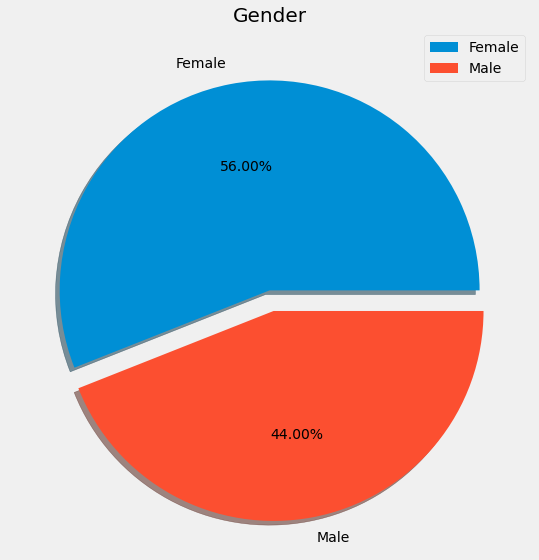

In [19]:
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

### **2.2 Multivariate Analysis**

เพื่อเลือก Feature กับ Feature ด้วยกันไปใช้ในการจัดกลุ่มข้อมูล

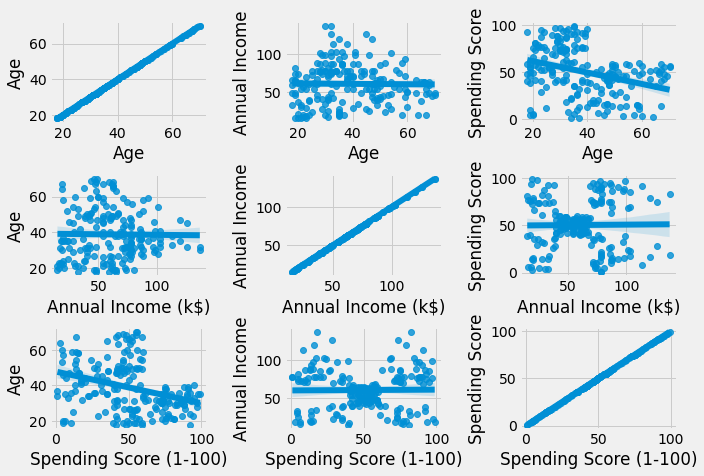

In [20]:


plt.figure(1 , figsize = (10 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = raw_pd)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()
     


Text(0.5, 1.08, 'Pairplot for the Data')

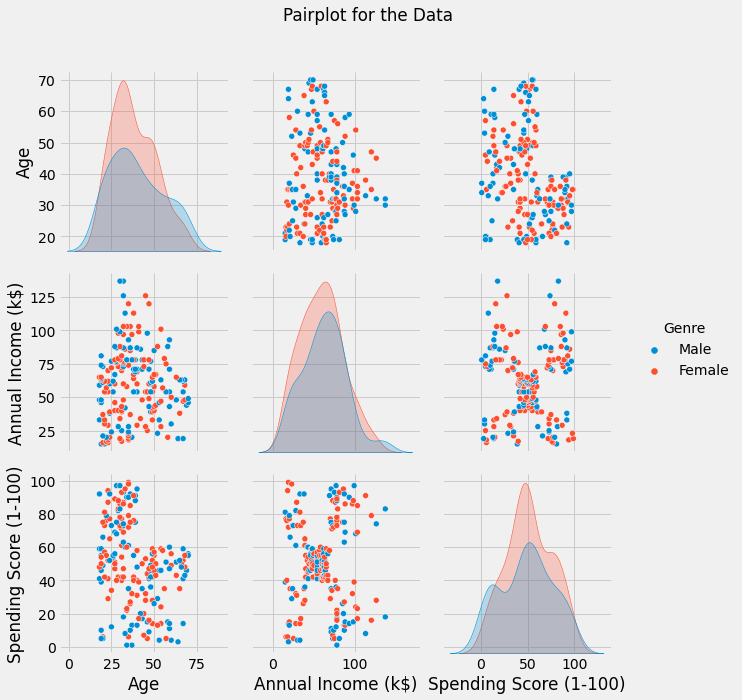

In [21]:
g = sns.pairplot(raw_pd.drop("CustomerID", axis=1), hue="Genre", height=3)
g.fig.suptitle("Pairplot for the Data", y=1.08) # y= some height>1

### พบว่ามีการเกาะกลุ่มได้ดีระหว่าง Age กับ Spending Score และ Spending Score กับ Annual Income
### ซึ่งจะสังเกตว่า Genre ไม่ได้ถูกจัดกลุ่มอยู่ในกลุ่มใดกลุ่มหนึ่งอย่างชัดเจน (กระจายตัวในทุกกลุ่ม)

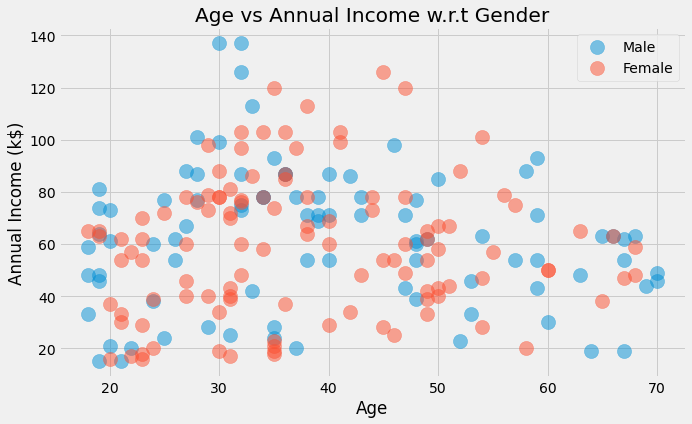

In [22]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = raw_pd[raw_pd['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

### ข้อมูลไม่ค่อยเกาะกลุ่มกัน ระหว่าง Age กับ Annual Income

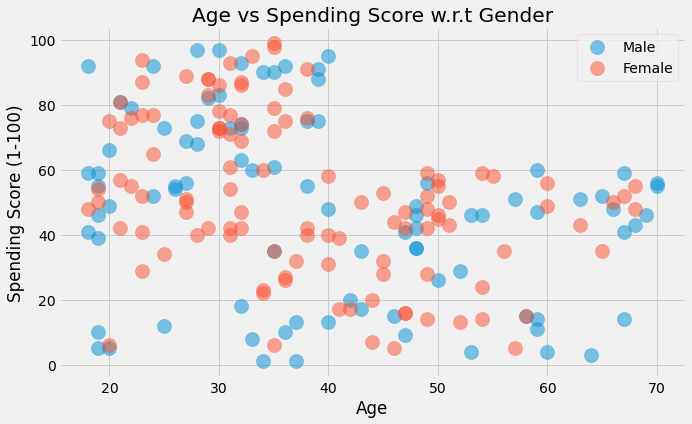

In [23]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = raw_pd[raw_pd['Genre'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### ข้อมูลเกาะกลุ่มกัน 4 กลุ่ม ระหว่าง Age กับ Spending Score

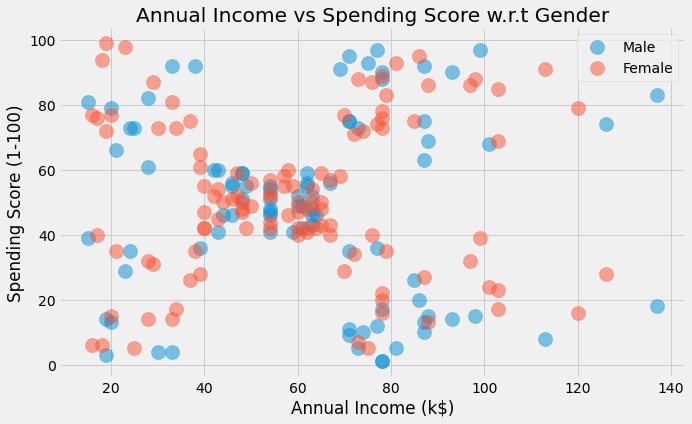

In [24]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = raw_pd[raw_pd['Genre'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### ข้อมูลเกาะกลุ่มกัน 5 กลุ่ม ระหว่าง Annual Income กับ Spending Score

# **3. Data Preparation**

ไม่มีค่าใน Columns/Variables ใด ให้เปลี่ยนแปลง

# **4. Modeling**

## **Customer Segmentation ด้วย Age และ Spending Score**

In [25]:
'''Age and spending Score'''
X1 = raw_pd[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
     


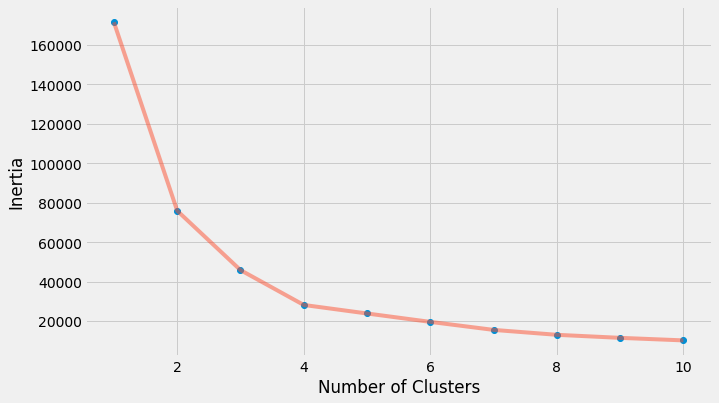

In [26]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
     
### จะมีการใช้ k=4 ต่อไป

In [27]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [28]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

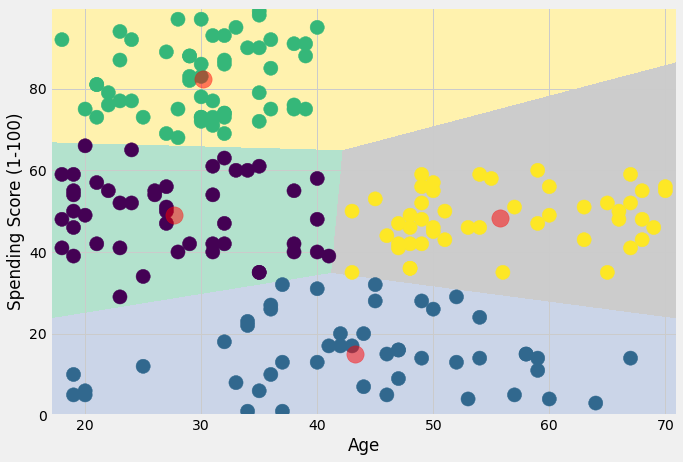

In [29]:


plt.figure(1 , figsize = (10 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = raw_pd , c = labels1 , 
            s = 200 , cmap = 'viridis')
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()
     


### **Customer Segmentation ด้วย Annual Income และ Spending Score**

In [30]:
'''Annual Income (k$) and spending Score'''
X2 = raw_pd[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
     


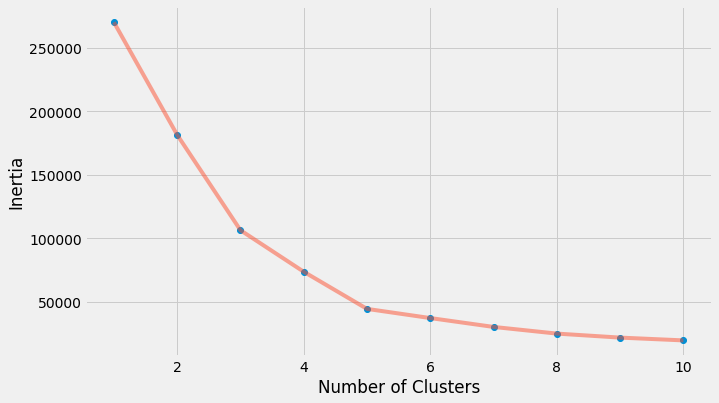

In [31]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
     
### จะมีการใช้ k=5 ต่อไป

In [32]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [33]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

In [34]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


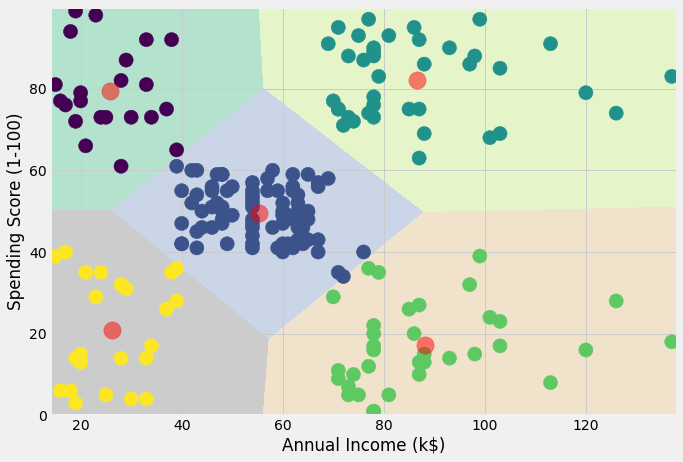

In [35]:
plt.figure(1 , figsize = (10 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = raw_pd , c = labels2 , 
            s = 200 , cmap = 'viridis')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()
     


### **Customer Segmentation ด้วย Age , Annual Income และ Spending Score**

In [36]:
X3 = raw_pd[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
     


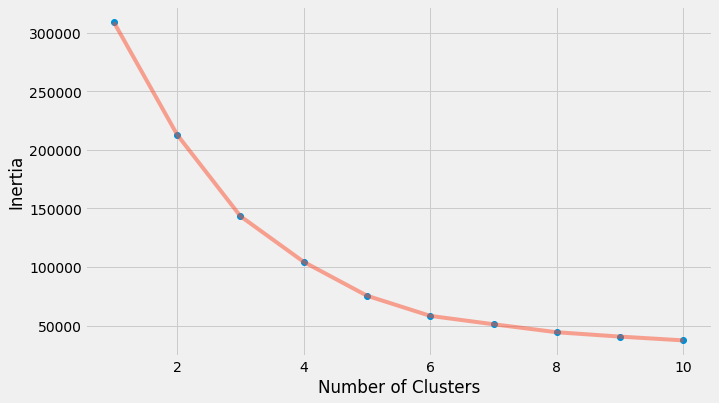

In [37]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()
     
### จะมีการใช้ k=6 ต่อไป

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [39]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [40]:
raw_pd['label3'] =  labels3
trace1 = go.Scatter3d(
    x= raw_pd['Age'],
    y= raw_pd['Spending Score (1-100)'],
    z= raw_pd['Annual Income (k$)'],
    mode='markers', 
     marker=dict(
        color = raw_pd['label3'], 
        size= 20,
        line=dict(
            color= raw_pd['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    width=640,
    height=640,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)

In [41]:
! pip show plotly

Name: plotly
Version: 5.5.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: tenacity, six
Required-by: datascience, cufflinks


In [42]:
fig.show()

# **5. Evaluation**

แดง - จ่ายหนัก รายได้สูง อายุไม่มาก
ซึ่งตรงข้ามกับ ม่วง ที่มีอายุอยู่ในวัยผู้ใหญ่ถึงกลางคน จ่ายเบา ทั้งที่รายสูง



ม่วงแดง กับ น้ำเงิน ครอบคลุมทุกช่วงอายุแต่จ่ายกลางๆ และรายได้กลางๆ


เหลือง - จ่ายหนัก รายได้ต่ำ อายุน้อย
ซึ่งตรงข้ามกับ ส้ม ที่จ่ายเบา แม้ว่าจะมีรายได้อยู่ในช่วงเดียวกับสีเหลือง


ในทางธุรกิจการทำความเข้าใจกลุ่มลูกค้าในแง่มุมการตอบสนองกับการตลาดที่ผ่านมา เป็นโมเดลทางธุรกิจที่เรียกว่า Propensity Model ซึ่งนำไปใช้มองแนวโน้มของลูกค้าว่า กลุ่มไหนหรือรายไหนมีความพร้อมจ่ายและต้องการข้อมูลเพิ่มเติม เป็นต้น

กลุ่มที่พร้อมจ่ายในที่นี้น่าจะเป็นกลุ่มแดง และกลุ่มเหลือง โดยควรเลือกประชาสัมพันธ์สินค้ากลุ่ม Luxuary ให้กับกลุ่มแดง ส่วนสินค้าที่ราคาไม่สูงนัก หรือสินค้าผ่อนได้ ควรเลือกประชาสัมพันธ์ให้กับกลุ่มเหลือง